In [1]:
import numpy as np


In [2]:
np.__version__

'1.16.2'

# 计算运行时间的两种方法

1. `%time`:计算单次运行时间
2. `%timeit`:计算平均运行时间

In [3]:
arr = np.random.randint(1, 1000, (100, 100000))

In [4]:
%time arr * 100

Wall time: 103 ms


array([[17600, 93500, 55900, ..., 91100, 42900, 57400],
       [ 5800, 60000, 78700, ..., 45500, 66600, 35300],
       [94600, 86600, 26000, ..., 74300, 18000,  8800],
       ...,
       [19400, 32300, 84100, ..., 92000, 38700, 53400],
       [51300, 42400, 50300, ..., 33000, 45700, 94200],
       [10800, 67800, 16200, ..., 72300, 53900, 83100]])

In [5]:
%timeit arr*100

41.5 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


1. `%%time`计算模块运行时间
2. `%%timeit` 计算模块平均运行时间

In [6]:
%%time
arr2 = arr * 10
arr2 + arr

Wall time: 73.5 ms


In [7]:
%%timeit 
arr2 = arr * 10
arr2 + arr

79.9 ms ± 957 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 显示魔法函数列表

In [8]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

# 创建等差数列

In [9]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [10]:
np.linspace(0, 10, 11, endpoint=False) # 不算结尾

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

# 保留小数

In [11]:
arr = np.random.random(1)
print(arr)
print(arr.round(2))

[0.13818083]
[0.14]


# 将图片数组化

In [12]:
from PIL import Image

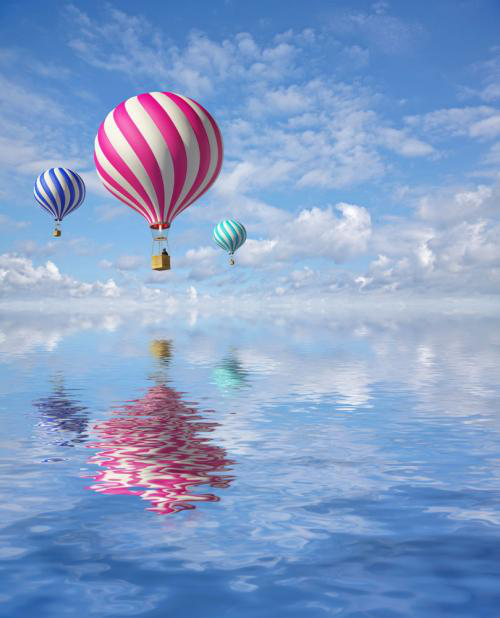

In [13]:
img = Image.open('images/1_2.jfif')
img

>图片一般是三维的数组，每个维度分别是  
(高度， 宽度， 像素)  或者 （行， 列， 其他）

In [14]:
img_arr = np.array(img)
img_arr.shape

(618, 500, 3)

> int8 = `2^8 = 256` int8是带符号的，所以它的显示范围是[-128, 127]   
uint8: 无符号整数[0, 256]

In [15]:
np.int8(129)

-127

利用数组变换， 改变图像

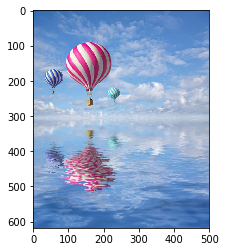

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(img)

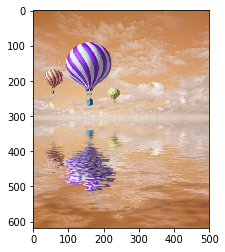

In [17]:
# 修改对像素的控制数组，实现图片颜色变换
img2 = Image.fromarray(img_arr[:,:,::-1])
plt.imshow(img2)

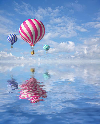

In [18]:
# 实现图片缩小
img3 = Image.fromarray(img_arr[::5, ::5])
img3

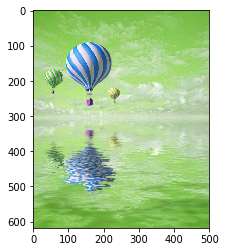

In [19]:
# 图片的像素为(r,g,b), 对像素进行变换
img3 = Image.fromarray(img_arr[:,:,[1,2,0]])
plt.imshow(img3)

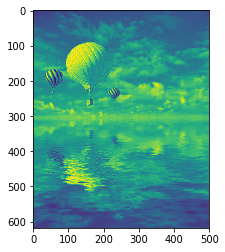

In [20]:
# 只提取图片的长和宽，不提取像素，实现图片灰度
img4 = img_arr[:,:,0]
plt.imshow(img4)

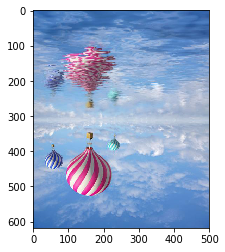

In [21]:
# 实现图片颠倒
plt.imshow(img_arr[::-1])

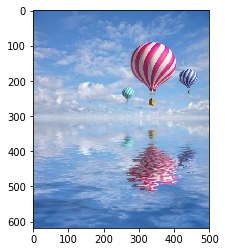

In [22]:
# 左右颠倒
plt.imshow(img_arr[:, ::-1])

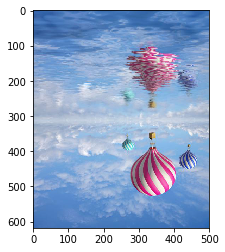

In [23]:
# 上下左右颠倒
plt.imshow(img_arr[::-1, ::-1])

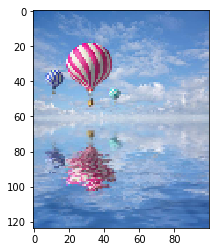

In [24]:
# 实现马赛克
plt.imshow(img_arr[::5, ::5])

# 数组转置，实现图片宽度和高度对调

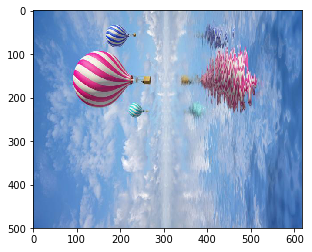

In [25]:
img6 = np.transpose(img_arr, axes=(1,0,2))  # 转置，axes=（）指定轴转换
plt.imshow(img6)

# `np.concatenate()`实现图片拼接

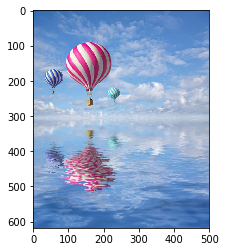

In [26]:
plt.imshow(img_arr)

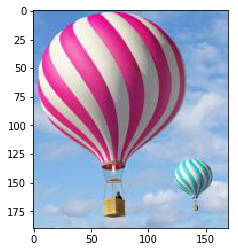

In [27]:
# 截取图片
img7 = img_arr[90:280, 90:260]
plt.imshow(img7)

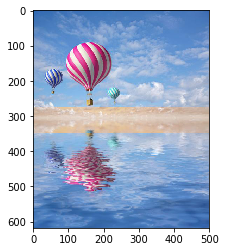

In [28]:
# 截取图片并拼接, 对高度进行截取
img8 = img_arr[:275]
# 截取高度[275,350),并调换颜色
img9 = img_arr[275:350, :, ::-1]
img10 = img_arr[350:]
img11 = np.concatenate([img8, img9, img10])
plt.imshow(img11)

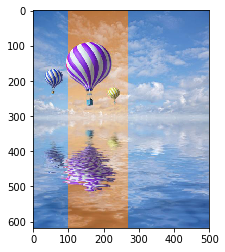

In [29]:
# 截取图片宽度
img12 = img_arr[:,:100]
img13 = img_arr[:, 100:270, ::-1]
img14 = img_arr[:, 270:]
# 指定对1轴(宽度)进行连接
img15 = np.concatenate([img12, img13, img14], axis=1)
plt.imshow(img15)